In this notebook I explore how the variance in speed, defined as $\Sigma(s_i-s)^2$, where $s$=average pace and $s_i$ is the pace from the $i-1$'th split to the $i$'th split. So for example, $s_2$ is the pace run from the 1st to the 2nd split (and thus the 5k to 10k).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data/2017/mens_speed.csv')

Below we'll take the speed over each 5k split (up to 40k), subtract the overall average speed, and square it. I'll call this the L2 speed difference.

In [3]:
speed_cols = ['5k_speed', '10k_speed', '15k_speed', '20k_speed', '25k_speed', '30k_speed', '35k_speed', '40k_speed']
split_cols = ['5k_split', '10k_split', '15k_split', '20k_split', '25k_split', '30k_split', '35k_split', '40k_split']
avg_speed_cols = ['10k_avg_speed', '15k_avg_speed', '20k_avg_speed', '25k_avg_speed', \
                  '30k_avg_speed', '35k_avg_speed', '40k_avg_speed', 'last_2k_speed', 'final_avg_speed']

In [6]:
df[speed_cols] = df[speed_cols].apply(pd.to_numeric)
df[split_cols] = df[split_cols].apply(pd.to_numeric)
df[avg_speed_cols] = df[avg_speed_cols].apply(pd.to_numeric)

In [7]:
L2_vals = df['5k_split']*0 # Quickly create a series filled with zeros of the correct length

for col in speed_cols:
    L2_vals += np.square(df[col] - df['final_avg_speed'])

In [8]:
df['L2_speed_diff'] = L2_vals

A quick glance doesn't reveal anything interesting that's going on. However, there's so many data points that it's hard to get a good picture.

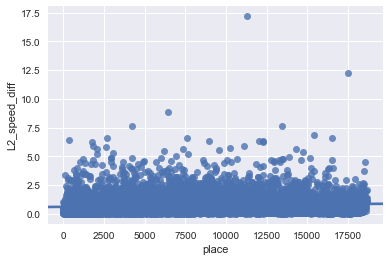

In [9]:
ax = sns.regplot(x='place', y='L2_speed_diff', data=df)

Instead we'll split the runners up into groups of size $N$ ($N=100$ by default), and compute their mean of their L2 speed difference. Here we can see much more clearly that higher placed runners have a lower speed variance. Interestingly, the speed variance begins to drop again for the slowest runners.

In [10]:
def L2_speed_every_N(N=100):
    return np.arange(1, 20000, N), [df[df['place'].between(n, n+N)]['L2_speed_diff'].mean() \
                                    for n in np.arange(1, 20000, N)]

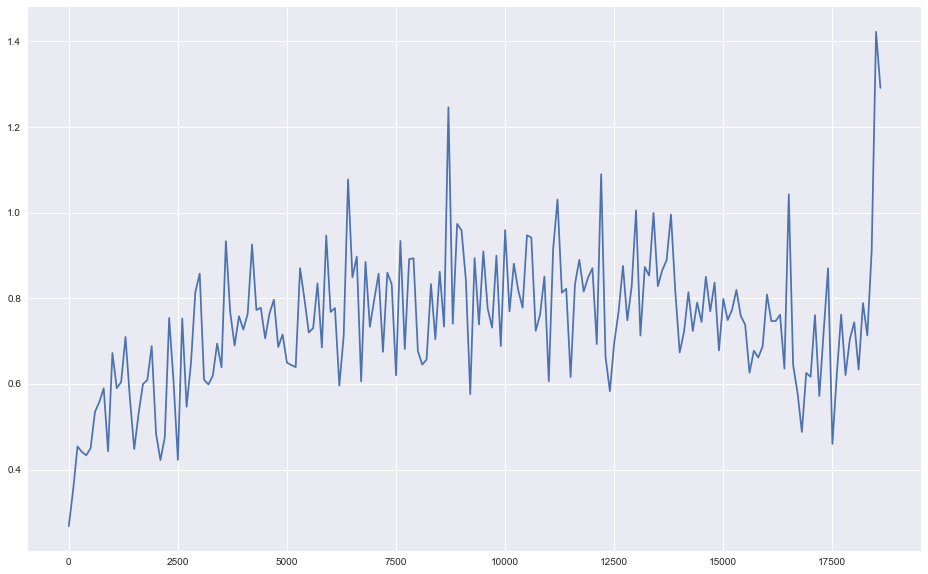

In [11]:
fig = plt.figure(figsize=(16, 10))
x, y = L2_speed_every_N(100)

plt.plot(x, y)

A good follow-up question would be: Is there any interesting pattern in how the various splits are run in relation to their average speed? That is, do top runners run their first splits right at their average pace, and slower runs go out fast?

In [12]:
def L2_speed_every_N_Dk(N=100, D=5):
    return np.arange(1, 20000, N), [(df[df['place'].between(n, n+N)][str(D) + 'k_speed'] - \
                                     df[df['place'].between(n, n+N)]['final_avg_speed']).mean() \
                                    for n in np.arange(1, 20000, N)]

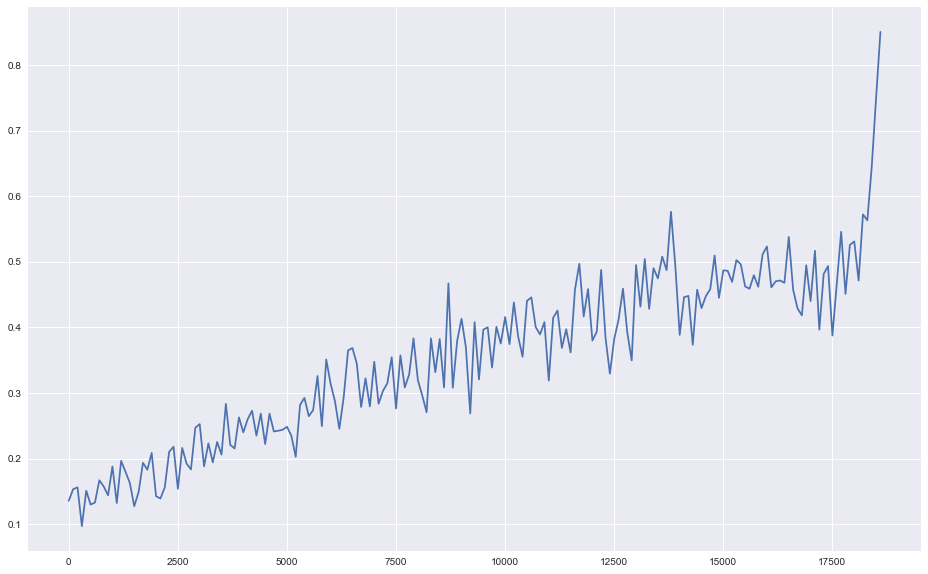

In [16]:
fig = plt.figure(figsize=(16, 10))

x5, y5 = L2_speed_every_N_Dk(N=100, D=5)
plt.plot(x5, y5)

x10, y10 = L2_speed_every_N_Dk(N=100, D=10)
#plt.plot(x10, y10)

x15, y15 = L2_speed_every_N_Dk(N=100, D=15)
#plt.plot(x15, y15)

In [19]:
def L2_speed_every_N_Dk_pct(N=100, D=5):
    return np.arange(1, 20000, N), [(df[df['place'].between(n, n+N)][str(D) + 'k_speed'] - \
                                     df[df['place'].between(n, n+N)]['final_avg_speed']).mean() \
                                    / df[df['place'].between(n, n+N)]['final_avg_speed'].mean() \
                                    for n in np.arange(1, 20000, N)]

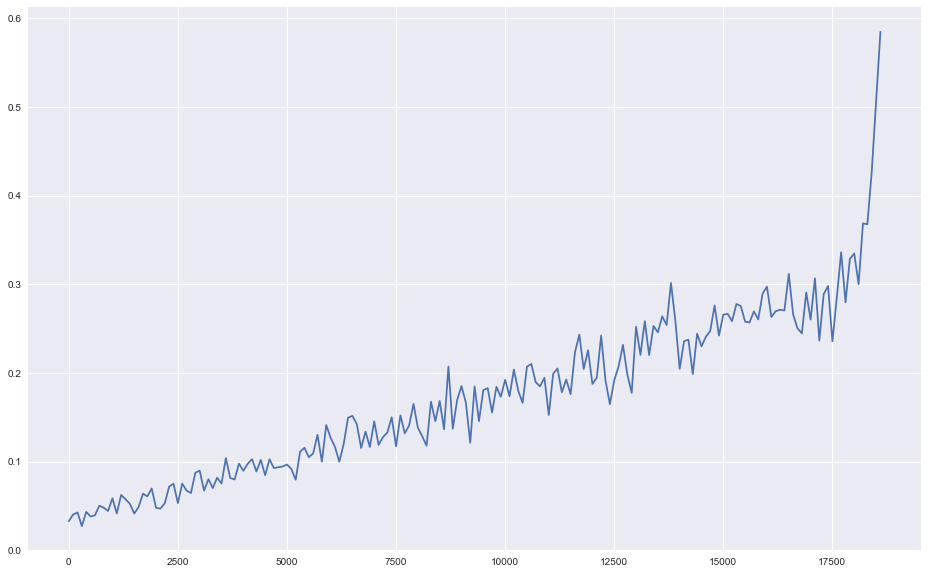

In [20]:
fig = plt.figure(figsize=(16, 10))

x5, y5 = L2_speed_every_N_Dk_pct(N=100, D=5)
plt.plot(x5, y5)